# Обнаружение атак на промышленные IoT-системы с использованием машинного обучения

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## 1. Анализ данных

In [2]:
benign_data = pd.read_csv("../data/benign_data/benign_samples_1sec.csv")
attack_data = pd.read_csv("../data/attack_data/attack_samples_1sec.csv")

In [3]:
df = pd.concat([benign_data, attack_data])

In [4]:
df.shape

(227191, 94)

In [ ]:
# Проверка наличия пропусков
df.isna().sum().sum()

0

In [10]:
df.head()

,device_name,device_mac,label_full,label1,label2,label3,label4,timestamp,timestamp_start,timestamp_end,...,network_time-delta_min,network_time-delta_std_deviation,network_ttl_avg,network_ttl_max,network_ttl_min,network_ttl_std_deviation,network_window-size_avg,network_window-size_max,network_window-size_min,network_window-size_std_deviation
0,router,28:87:ba:bd:c6:6c,benign_whole-network3,benign,benign,benign,benign,2025-09-09T14:09:40.400000Z_2025-09-09T14:09:4...,2025-09-09T14:09:40.400000Z,2025-09-09T14:09:41.400000Z,...,0.0,0.006059,62.800000,64.0,61.0,1.469694,1870.500000,3081.0,660.0,1210.500000
1,router,28:87:ba:bd:c6:6c,benign_whole-network3,benign,benign,benign,benign,2025-09-09T14:09:41.400000Z_2025-09-09T14:09:4...,2025-09-09T14:09:41.400000Z,2025-09-09T14:09:42.400000Z,...,0.0,0.016469,62.500000,64.0,61.0,1.500000,1870.500000,3081.0,660.0,1210.500000
2,router,28:87:ba:bd:c6:6c,benign_whole-network3,benign,benign,benign,benign,2025-09-09T14:09:42.400000Z_2025-09-09T14:09:4...,2025-09-09T14:09:42.400000Z,2025-09-09T14:09:43.400000Z,...,0.0,0.034312,61.571429,64.0,53.0,3.736199,2441.285714,4736.0,135.0,1813.237335
3,router,28:87:ba:bd:c6:6c,benign_whole-network3,benign,benign,benign,benign,2025-09-09T14:09:43.400000Z_2025-09-09T14:09:4...,2025-09-09T14:09:43.400000Z,2025-09-09T14:09:44.400000Z,...,0.0,0.012790,62.500000,64.0,61.0,1.500000,1870.500000,3081.0,660.0,1210.500000
4,router,28:87:ba:bd:c6:6c,benign_whole-network3,benign,benign,benign,benign,2025-09-09T14:09:44.400000Z_2025-09-09T14:09:4...,2025-09-09T14:09:44.400000Z,2025-09-09T14:09:45.400000Z,...,0.0,0.017764,62.800000,64.0,61.0,1.469694,2112.600000,3081.0,660.0,1186.042933


In [11]:
df.columns

Index(['device_name', 'device_mac', 'label_full', 'label1', 'label2', 'label3',
       'label4', 'timestamp', 'timestamp_start', 'timestamp_end',
       'log_data-ranges_avg', 'log_data-ranges_max', 'log_data-ranges_min',
       'log_data-ranges_std_deviation', 'log_data-types',
       'log_data-types_count', 'log_interval-messages', 'log_messages_count',
       'network_fragmentation-score', 'network_fragmented-packets',
       'network_header-length_avg', 'network_header-length_max',
       'network_header-length_min', 'network_header-length_std_deviation',
       'network_interval-packets', 'network_ip-flags_avg',
       'network_ip-flags_max', 'network_ip-flags_min',
       'network_ip-flags_std_deviation', 'network_ip-length_avg',
       'network_ip-length_max', 'network_ip-length_min',
       'network_ip-length_std_deviation', 'network_ips_all',
       'network_ips_all_count', 'network_ips_dst', 'network_ips_dst_count',
       'network_ips_src', 'network_ips_src_count', 'network_

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
log_data-ranges_avg,227191.0,55.375012,206.965792,0.00,0.0,0.0,0.000000,2000.000000
log_data-ranges_max,227191.0,56.110518,208.576679,0.00,0.0,0.0,0.000000,2000.000000
log_data-ranges_min,227191.0,53.880292,202.493839,-0.94,0.0,0.0,0.000000,2000.000000
log_data-ranges_std_deviation,227191.0,0.672938,14.058134,0.00,0.0,0.0,0.000000,574.959575
log_data-types_count,227191.0,0.260926,0.535990,0.00,0.0,0.0,0.000000,2.000000
...,...,...,...,...,...,...,...,...
network_ttl_std_deviation,227191.0,30.161640,42.914745,0.00,0.0,0.0,93.964042,127.000000
network_window-size_avg,227191.0,9747.344636,15490.955824,0.00,0.0,0.0,20224.919072,65535.000000
network_window-size_max,227191.0,22039.686062,29966.943420,0.00,0.0,0.0,64062.000000,65535.000000
network_window-size_min,227191.0,1369.114252,3591.103767,0.00,0.0,0.0,1024.000000,65535.000000


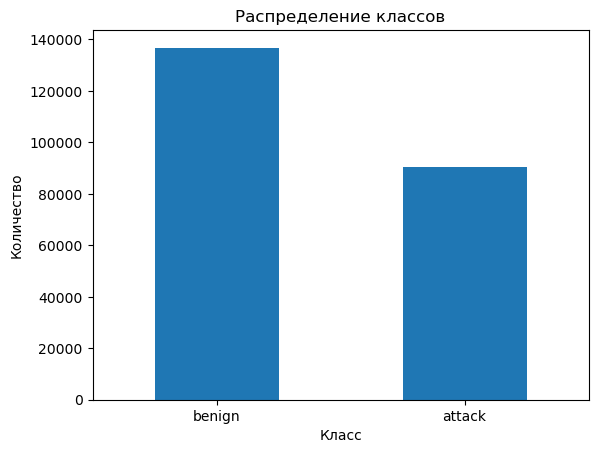

In [25]:
df['label1'].value_counts().plot(kind='bar')
plt.title("Распределение классов")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.show()

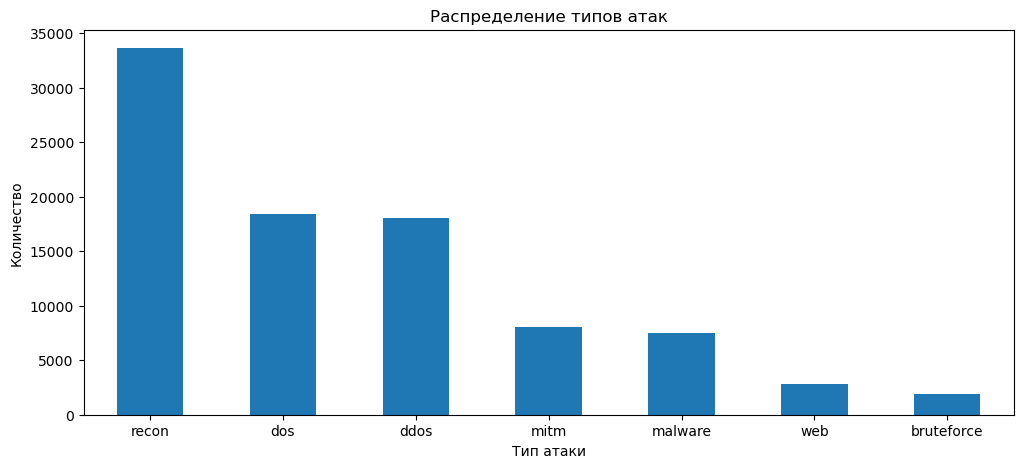

In [24]:
attack_data['label2'].value_counts().plot(kind='bar', figsize=(12,5))
plt.title("Распределение типов атак")
plt.xlabel("Тип атаки")
plt.ylabel("Количество")
plt.xticks(rotation=0)
plt.show()

## 2. Работа с признаками

Удалим признаки, которые не несут полезной информации или являются списками/текстовыми полями.

In [ ]:
cols_to_drop = [
    # Лишние метки
    "label_full", "label3", "label4",

    # Метаданные
    "device_name", "device_mac",

    # Время
    "timestamp", "timestamp_start", "timestamp_end",

    # Списочные признаки (все с _all, кроме *_count)
    "log_data-types",
    "network_ips_all", "network_ips_dst", "network_ips_src",
    "network_macs_all", "network_macs_dst", "network_macs_src",
    "network_ports_all", "network_ports_dst", "network_ports_src",
    "network_protocols_all", "network_protocols_dst", "network_protocols_src"
]

df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

In [27]:
df.shape

(227191, 73)

Количество константных признаков (стандартное отклонение равно 0)

In [42]:
sum(df.describe().T['std'] == 0)

0

Доля нулевых значений для каждого признака.

In [56]:
zero_fraction = (df == 0).mean().sort_values(ascending=False)
zero_fraction.head(20)

network_header-length_std_deviation    0.999582
network_tcp-flags-urg_count            0.997848
network_mss_std_deviation              0.994885
log_interval-messages                  0.990325
log_data-ranges_std_deviation          0.971214
network_fragmentation-score            0.962622
network_fragmented-packets             0.962622
network_tcp-flags-fin_count            0.955108
network_ip-flags_min                   0.946481
network_payload-length_min             0.898561
network_mss_max                        0.841270
network_mss_min                        0.841270
network_mss_avg                        0.841270
network_tcp-flags-syn_count            0.830169
log_data-ranges_min                    0.807189
network_tcp-flags-rst_count            0.806898
log_data-ranges_max                    0.806713
log_data-ranges_avg                    0.806713
log_messages_count                     0.786294
log_data-types_count                   0.786294
dtype: float64

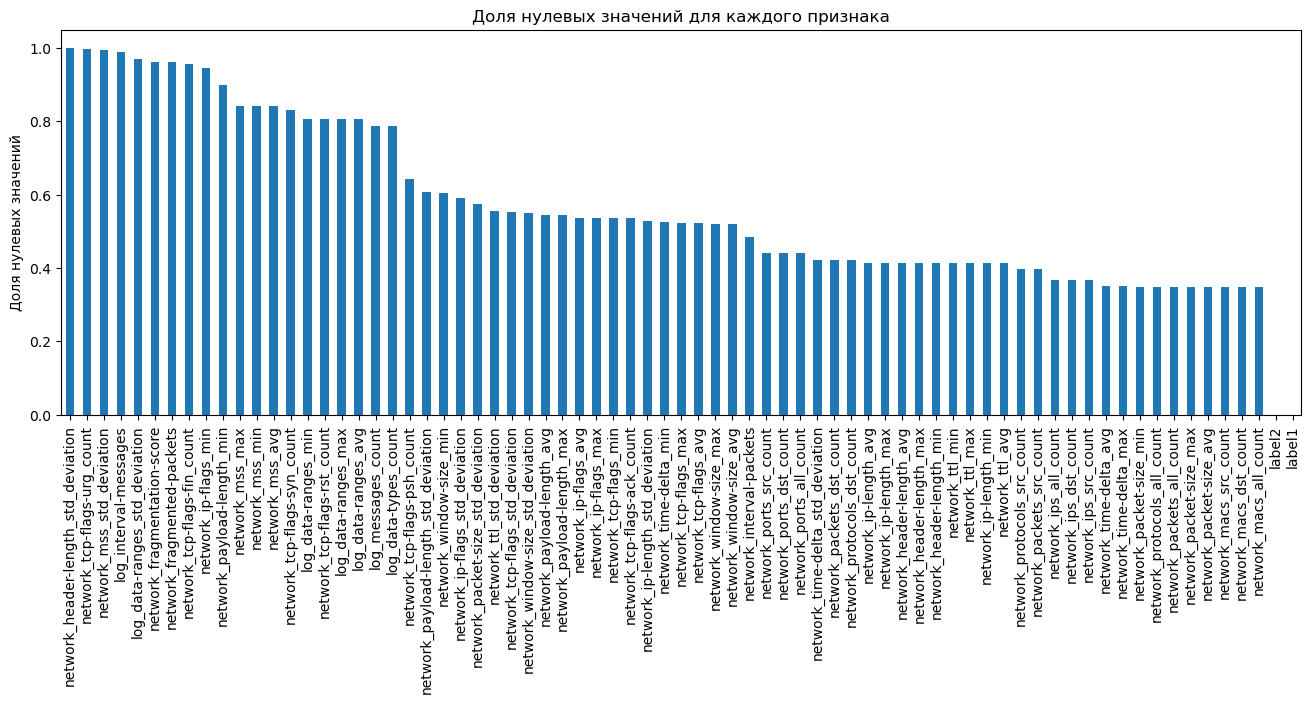

In [55]:
zero_fraction.plot(kind="bar", figsize=(16,5))
plt.ylabel("Доля нулевых значений")
plt.title("Доля нулевых значений для каждого признака")
plt.show()

Нахождение признаков с самой низкой важностью через RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop(columns=["label1", "label2"])
y = df["label2"]

rf = RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1)
rf.fit(X, y)

feat_imp = pd.Series(rf.feature_importances_, index=X.columns)

In [53]:
feat_imp.sort_values().head(20)

network_header-length_std_deviation    0.000005
network_tcp-flags-urg_count            0.000056
network_mss_std_deviation              0.000126
network_header-length_max              0.000338
network_header-length_min              0.000531
network_ip-flags_max                   0.000705
network_header-length_avg              0.000876
network_fragmentation-score            0.001020
log_interval-messages                  0.001403
network_fragmented-packets             0.001551
network_protocols_all_count            0.001569
log_data-ranges_std_deviation          0.001754
network_ip-flags_min                   0.002168
log_data-ranges_min                    0.002855
network_payload-length_min             0.002982
network_protocols_dst_count            0.003262
log_data-types_count                   0.003477
network_tcp-flags_max                  0.003610
log_data-ranges_max                    0.003800
log_data-ranges_avg                    0.003981
dtype: float64

Удалим признаки, которые имеют более 99% нулевых значений и низкую важность по RandomForest.

In [57]:
to_drop = [
    "network_header-length_std_deviation",
    "network_tcp-flags-urg_count",
    "network_mss_std_deviation"
]

df = df.drop(columns=to_drop)

In [58]:
df.shape

(227191, 70)

Распределения каждого признака по классам Benign vs Attack

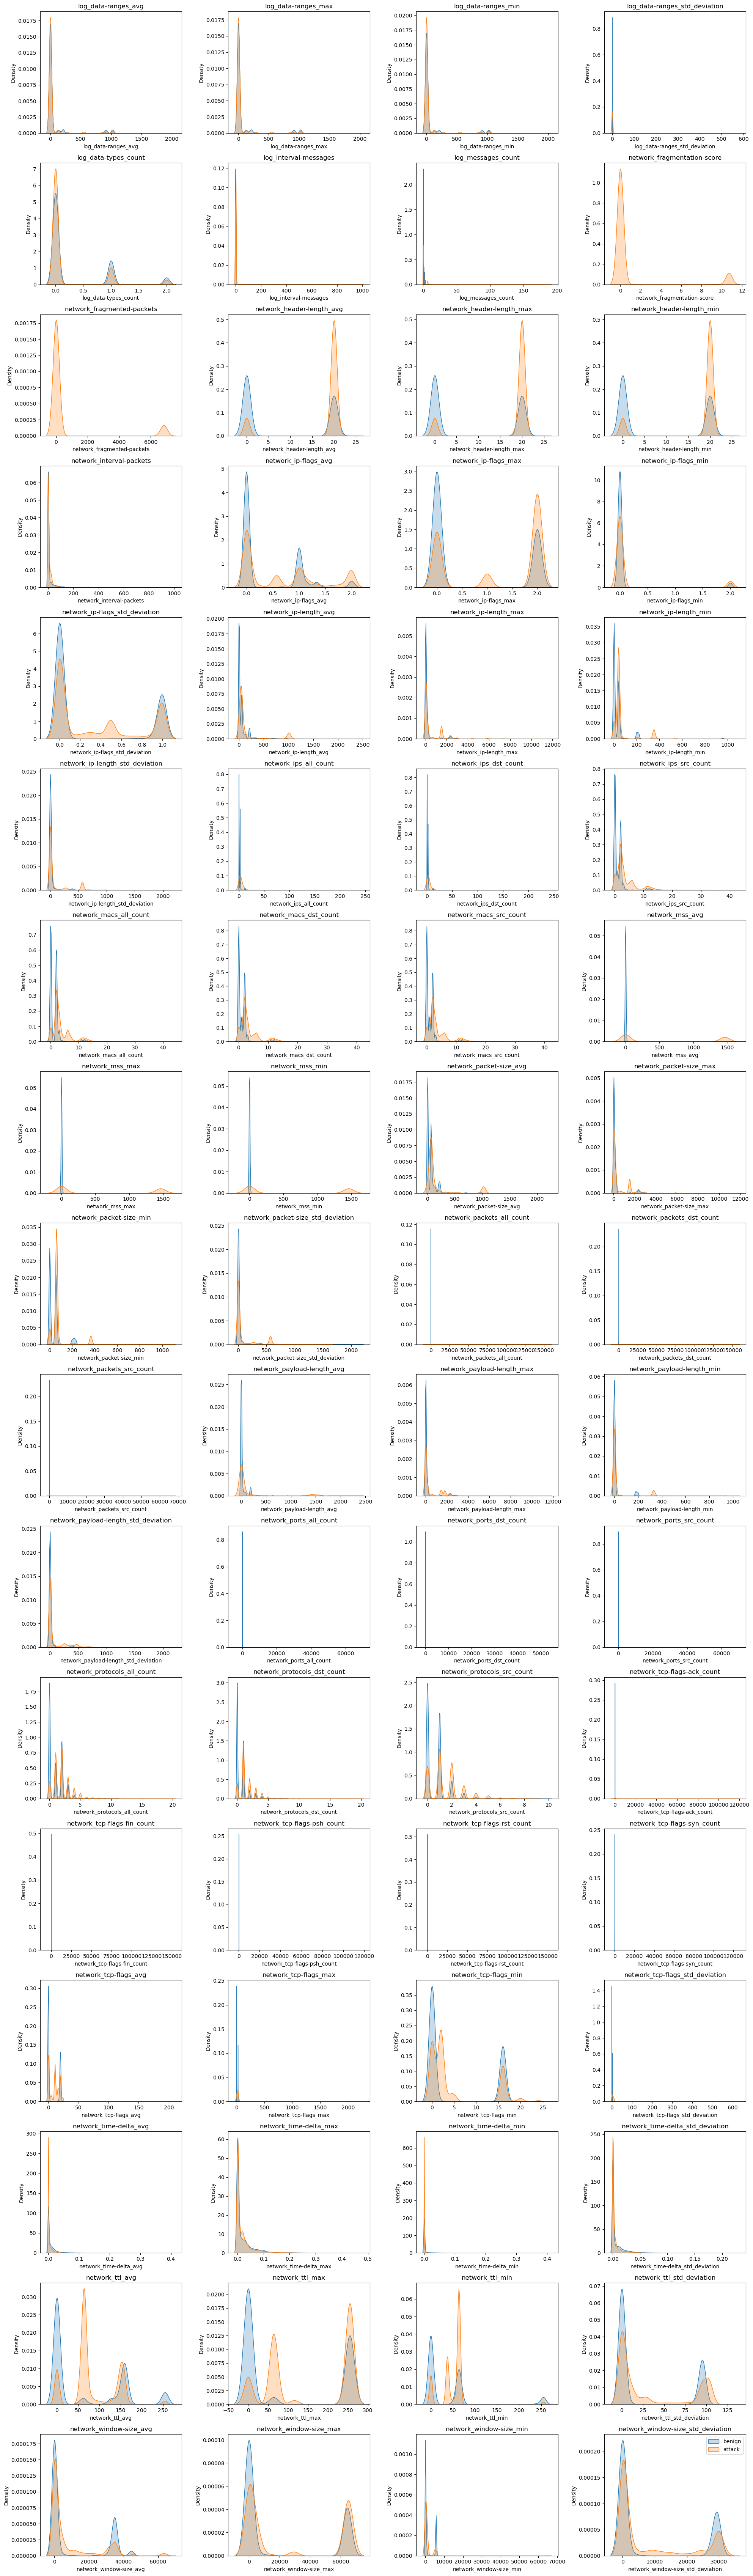

In [73]:
# Выбираем все признаки, кроме меток
features = [col for col in df.columns if not col.startswith("label")]

# Задаём количество колонок в сетке
n_cols = 4
n_rows = math.ceil(len(features) / n_cols)

plt.figure(figsize=(n_cols*5, n_rows*4))  # размер фигуры под сетку

for i, col in enumerate(features):
    plt.subplot(n_rows, n_cols, i+1)
    sns.kdeplot(df[df['label1']=='benign'][col], label='benign', fill=True, warn_singular=False)
    sns.kdeplot(df[df['label1']=='attack'][col], label='attack', fill=True, warn_singular=False)
    plt.title(col)
    plt.tight_layout()

plt.legend()
plt.show()

Распределения каждого признака по классам атак

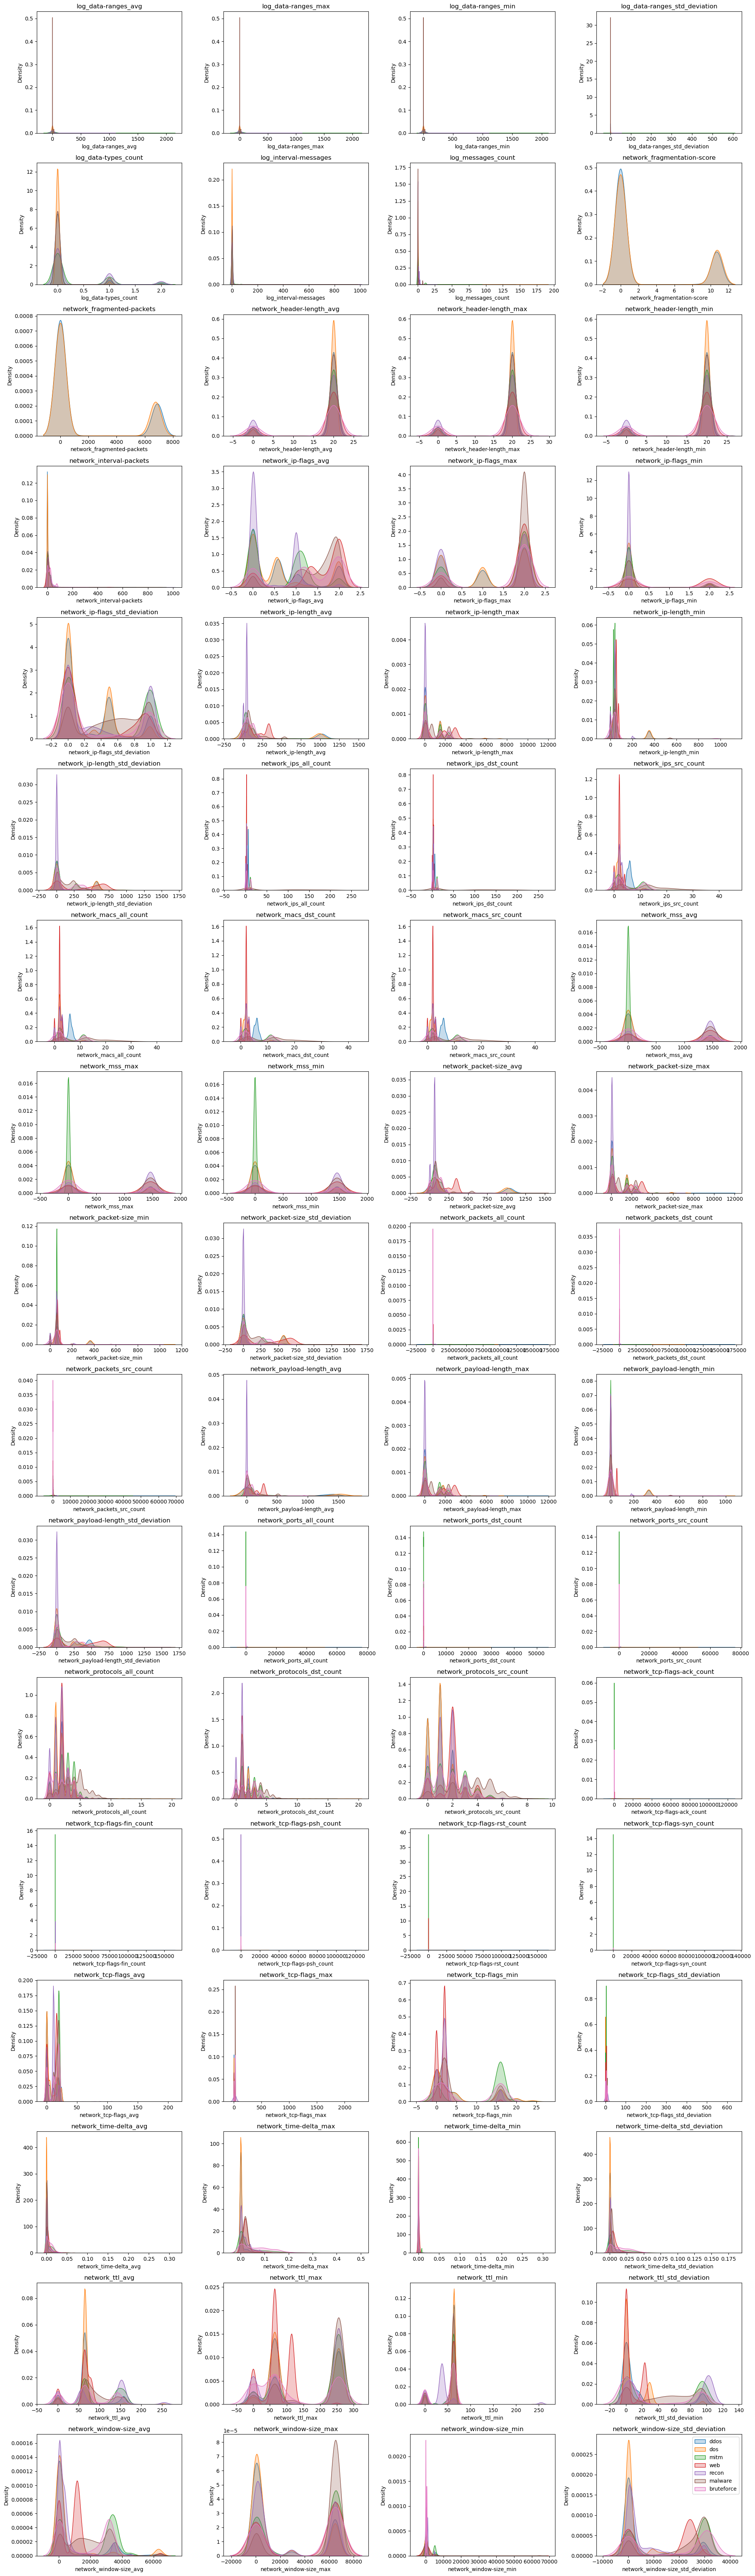

In [74]:
# Выбираем все признаки, кроме меток
features = [col for col in df.columns if not col.startswith("label")]

# Задаём количество колонок в сетке
n_cols = 4
n_rows = math.ceil(len(features) / n_cols)

plt.figure(figsize=(n_cols*5, n_rows*4))  # размер фигуры под сетку

for i, col in enumerate(features):
    plt.subplot(n_rows, n_cols, i+1)
    sns.kdeplot(df[df['label2']=='ddos'][col], label='ddos', fill=True, warn_singular=False)
    sns.kdeplot(df[df['label2']=='dos'][col], label='dos', fill=True, warn_singular=False)
    sns.kdeplot(df[df['label2']=='mitm'][col], label='mitm', fill=True, warn_singular=False)
    sns.kdeplot(df[df['label2']=='web'][col], label='web', fill=True, warn_singular=False)
    sns.kdeplot(df[df['label2']=='recon'][col], label='recon', fill=True, warn_singular=False)
    sns.kdeplot(df[df['label2']=='malware'][col], label='malware', fill=True, warn_singular=False)
    sns.kdeplot(df[df['label2']=='bruteforce'][col], label='bruteforce', fill=True, warn_singular=False)
    plt.title(col)
    plt.tight_layout()

plt.legend()
plt.show()

Тепловая карта корреляций признаков.

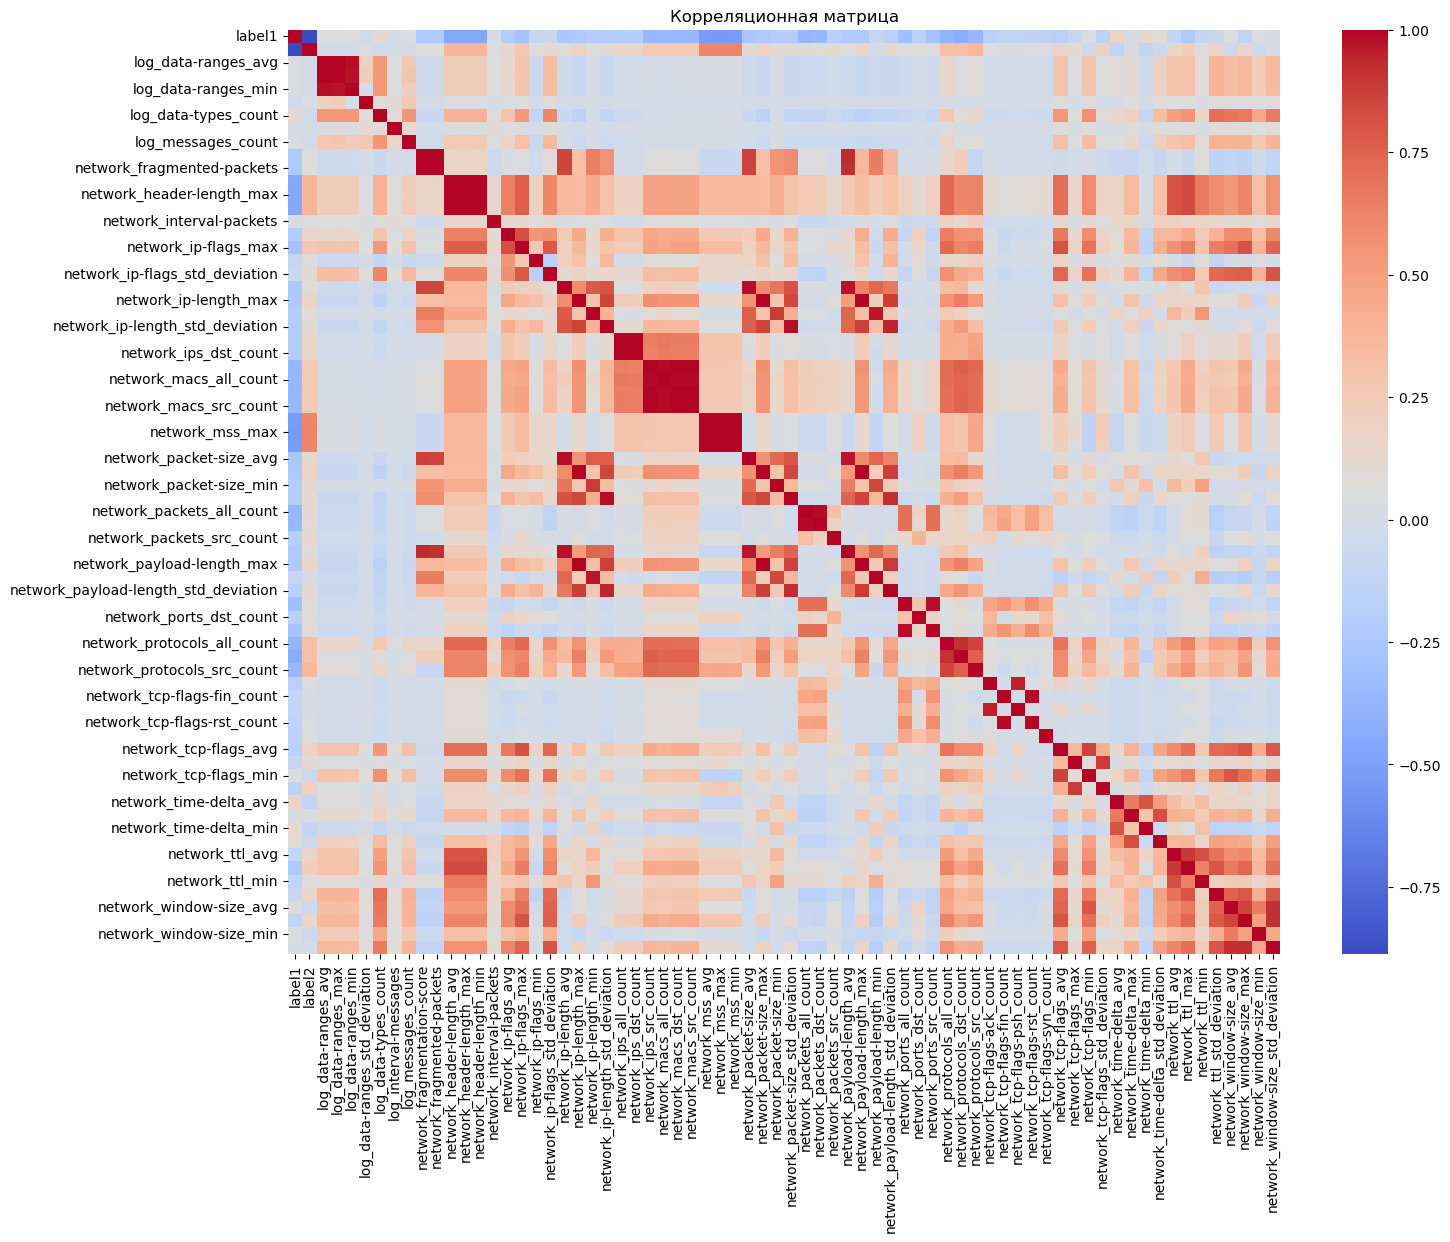

In [83]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

le1 = LabelEncoder()
df_encoded['label1'] = le1.fit_transform(df_encoded['label1'])

le2 = LabelEncoder()
df_encoded['label2'] = le2.fit_transform(df_encoded['label2'])


plt.figure(figsize=(16,12))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title('Корреляционная матрица')
plt.show()

Корреляции между признаками.

In [100]:
def print_highly_correlated(df, threshold=0.5):
    """Prints highly correlated features pairs in the data frame (helpful for feature engineering)"""
    corr_df = df.corr() # get correlations
    correlated_features = np.where(np.abs(corr_df) > threshold) # select ones above the abs threshold
    correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
    s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value

    if s_corr_list == []:
        print("There are no highly correlated features with correlation above", threshold)
    else:
        for v, i, j in s_corr_list:
            cols = df[features].columns
            print ("%s and %s = %.3f" % (corr_df.index[i], corr_df.columns[j], v))

In [102]:
print_highly_correlated(df_encoded, threshold=0.9)

network_macs_dst_count and network_macs_src_count = 1.000
network_header-length_avg and network_header-length_min = 1.000
network_header-length_avg and network_header-length_max = 1.000
network_header-length_max and network_header-length_min = 1.000
network_ip-length_max and network_packet-size_max = 0.999
network_ips_all_count and network_ips_dst_count = 0.999
network_mss_avg and network_mss_max = 0.999
log_data-ranges_avg and log_data-ranges_max = 0.997
network_mss_avg and network_mss_min = 0.997
network_ip-length_max and network_payload-length_max = 0.997
network_packet-size_max and network_payload-length_max = 0.996
network_fragmentation-score and network_fragmented-packets = 0.996
network_mss_max and network_mss_min = 0.995
network_ips_src_count and network_macs_dst_count = 0.993
network_ips_src_count and network_macs_src_count = 0.993
network_packets_all_count and network_packets_dst_count = 0.992
network_macs_all_count and network_macs_dst_count = 0.992
network_macs_all_count an

Удалим признаки, которые имеют сильную корреляцию.

In [103]:
to_drop_corr = [
    "network_macs_src_count",
    "network_header-length_min",
    "network_header-length_max",
    "network_packet-size_max",
    "network_ips_all_count",
    "network_mss_max",
    "network_mss_min",
    "log_data-ranges_max",
    "network_payload-length_max",
    "network_tcp-flags-rst_count",
    "network_packets_dst_count",
    "network_macs_dst_count",
    "network_payload-length_avg"
]

df = df.drop(columns=to_drop_corr)

In [104]:
df.shape

(227191, 57)

In [105]:
df.columns

Index(['label1', 'label2', 'log_data-ranges_avg', 'log_data-ranges_min',
       'log_data-ranges_std_deviation', 'log_data-types_count',
       'log_interval-messages', 'log_messages_count',
       'network_fragmentation-score', 'network_fragmented-packets',
       'network_header-length_avg', 'network_interval-packets',
       'network_ip-flags_avg', 'network_ip-flags_max', 'network_ip-flags_min',
       'network_ip-flags_std_deviation', 'network_ip-length_avg',
       'network_ip-length_max', 'network_ip-length_min',
       'network_ip-length_std_deviation', 'network_ips_dst_count',
       'network_ips_src_count', 'network_macs_all_count', 'network_mss_avg',
       'network_packet-size_avg', 'network_packet-size_min',
       'network_packet-size_std_deviation', 'network_packets_all_count',
       'network_packets_src_count', 'network_payload-length_min',
       'network_payload-length_std_deviation', 'network_ports_all_count',
       'network_ports_dst_count', 'network_ports_src_coun

Сохранение датасета

In [106]:
df.to_csv('../data/dataset_clean.csv', index=False)